In [2]:
import os, json
from pathlib import Path
import datetime
import astropy.units as u
from astropy.time import Time
import matplotlib.pyplot as plt
import numpy as np

os.environ['OMP_NUM_THREADS']='16'

from pyampp0.query_sunpy     import download_closest_magnetograms
from pyampp0.ampp_compute    import ampp_field
from pyampp0.contrib.radio   import GXRadioImageComputing
from pyampp0.contrib.visuals import Box

In [3]:
conf_path = Path("./test_files.json").resolve()
if not conf_path.exists():
    print("does not exist, using default parameters")
    data_path = (Path("./data")).resolve()
    ebtel_file = "/path/to/your/gx_simulator/userslib/aia/ebtel/ebtel.sav"
    jsoc_email = "test@example.com"
else:
    config = json.load(open(str(conf_path), "rb"))
    ebtel_file = config["ebtel_file"]
    jsoc_email = config["jsoc_email"]

In [4]:
dt = datetime.datetime(2024, 5, 5, 5, 0)
xc=285
yc=475

Navigate to <http://jsoc.stanford.edu/ajax/register_email.html> to register your mail

<https://docs.sunpy.org/en/stable/generated/api/sunpy.net.jsoc.JSOCClient.html>

Download ebtel file for radio source modeling here: <https://github.com/Gelu-Nita/GX_SIMULATOR/tree/master/userslib/ebtel>

In [6]:
#in_files = download_closest_magnetograms(dt, data_path, jsoc_email)
in_files

downloading for time 2024-05-05 05:00:00.000
Export request pending. [id=JSOC_20240827_000237, status=2]
Waiting for 0 seconds...
4 URLs found for download. Full request totalling 61MB


Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

hmi.b_720s.20240505_050000_TAI.inclination.fits:   0%|          | 0.00/16.0M [00:00<?, ?B/s]

hmi.b_720s.20240505_050000_TAI.azimuth.fits:   0%|          | 0.00/21.9M [00:00<?, ?B/s]

hmi.b_720s.20240505_050000_TAI.disambig.fits:   0%|          | 0.00/5.47M [00:00<?, ?B/s]

hmi.b_720s.20240505_050000_TAI.field.fits:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

Export request pending. [id=JSOC_20240827_000239, status=2]
Waiting for 0 seconds...
1 URLs found for download. Full request totalling 13MB


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

hmi.m_720s.20240505_050000_TAI.3.magnetogram.fits:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

Export request pending. [id=JSOC_20240827_000240, status=2]
Waiting for 0 seconds...
1 URLs found for download. Full request totalling 15MB


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

hmi.ic_nolimbdark_720s.20240505_050000_TAI.3.continuum.fits:   0%|          | 0.00/15.7M [00:00<?, ?B/s]

['inputs_2/hmi.b_720s.20240505_050000_TAI.inclination.fits', 'inputs_2/hmi.b_720s.20240505_050000_TAI.azimuth.fits', 'inputs_2/hmi.b_720s.20240505_050000_TAI.disambig.fits', 'inputs_2/hmi.b_720s.20240505_050000_TAI.field.fits', 'inputs_2/hmi.m_720s.20240505_050000_TAI.3.magnetogram.fits', 'inputs_2/hmi.ic_nolimbdark_720s.20240505_050000_TAI.3.continuum.fits']

In [4]:
ampp_field(data_directory, "./model.h5", xc, yc, 128, 64, 64, res=700*u.km)

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html for the FITS unit standards. [sunpy.map.mapbase]
See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html for the FITS unit standards. [sunpy.map.mapbase]
See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html for the FITS unit standards. [sunpy.map.mapbase]


opening file
NLFFF energy:     1.6929159269766023e+32 erg
Calculating field lines
cutoff_qs:  0.991392949634659 1003
cutoff_b:  1.0160090636373977
cutoff_f:  1.0359026067367256
umbra: nelem=  1066  abs(B) range:  4.134217929830154 1761.6771372266035
penumbra: nelem=  2041  abs(B) range:  0.16699691493248664 1100.8657483968557
eNW: nelem=  153  abs(B) range:  0.5800714707914201 463.9385530280463
NW: nelem=  1118  abs(B) range:  0.03954448135178388 426.09131414242046
IN: nelem=  3814  abs(B) range:  0.016618412613616455 699.170757691664
plage: nelem=  2547  abs(B) range:  30.000891663325778 600.159185554152
facula: nelem=  1647  abs(B) range:  30.000891663325778 495.6912713128649
Total elements:  12386
Number of elements in cont:  8192


In [5]:
vis_box = Box("./model.h5", 700*u.km)

[ 64 128  64]
{'x': <Quantity [ 0.        ,  0.71111111,  1.42222222,  2.13333333,  2.84444444,
            3.55555556,  4.26666667,  4.97777778,  5.68888889,  6.4       ,
            7.11111111,  7.82222222,  8.53333333,  9.24444444,  9.95555556,
           10.66666667, 11.37777778, 12.08888889, 12.8       , 13.51111111,
           14.22222222, 14.93333333, 15.64444444, 16.35555556, 17.06666667,
           17.77777778, 18.48888889, 19.2       , 19.91111111, 20.62222222,
           21.33333333, 22.04444444, 22.75555556, 23.46666667, 24.17777778,
           24.88888889, 25.6       , 26.31111111, 27.02222222, 27.73333333,
           28.44444444, 29.15555556, 29.86666667, 30.57777778, 31.28888889,
           32.        , 32.71111111, 33.42222222, 34.13333333, 34.84444444,
           35.55555556, 36.26666667, 36.97777778, 37.68888889, 38.4       ,
           39.11111111, 39.82222222, 40.53333333, 41.24444444, 41.95555556,
           42.66666667, 43.37777778, 44.08888889, 44.8       ] Mm>, 

In [ ]:
#vis_box.open_window()

Creating a model of GR radiosource

In [2]:
gxi = GXRadioImageComputing()

In [4]:
ebtel, ebtel_dt = gxi.load_ebtel(ebtel_file)
model, model_dt = gxi.load_model_hdf("./model.h5")

In [7]:
box_Nx=150
box_Ny=150
box_dx=2.0
box_dy=2.0

freqlist=[5.0, 7.0]

Tbase=1e6
nbase=1e8
Q0=4.5e-3
a=1.5
b=2.5

results = gxi.synth_model(model, model_dt,
                          ebtel, ebtel_dt, freqlist,
                          box_Nx, box_Ny, xc, yc, box_dx, box_dy, Tbase, nbase, Q0, a, b, force_isothermal=1)

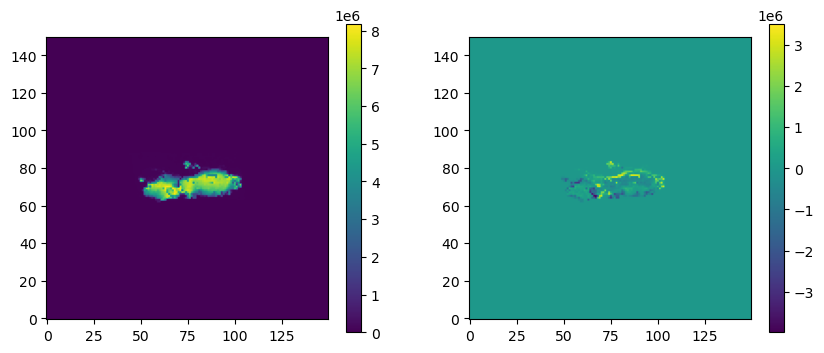

In [8]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
i1 = ax1.imshow(results["TI"][:, :, 0].T, origin='lower')
i2 = ax2.imshow(results["TV"][:, :, 0].T, origin='lower')

plt.colorbar(i1, ax=ax1)
plt.colorbar(i2, ax=ax2)

plt.show()